In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from scipy.io import loadmat
from dtmrpy.io import loadsrc, loadfib, loadtdi, generate_tt

from dtmrpy import get_diffusion_data, get_diffusion_data_hcp, get_covariances, DT_GMM


In [8]:
main_folder = "C:\\Users\\micha\\OneDrive - Florida State University\\Projects\\DTMRI\\HCP\\"
data_folder = main_folder+"HCP_YA1065_QSDR_FIB\\"
save_folder = "C:\\Users\\micha\\Desktop\\New folder\\"

covariates = pd.read_csv(main_folder+"subject_info.csv")

sid = covariates['Subject'].values.astype(str)
tract_names = pd.read_csv("C:\\Users\\micha\\OneDrive - Florida State University\\Projects\\DTMRI\\roi_names.csv", header=None)[0].values.astype(str)
labels = covariates['Gender'].to_numpy()
age = covariates['Age'].values

In [10]:
# import shutil

# fib_folder = 'C:\\Users\\micha\\OneDrive - Florida State University\\Projects\\DTMRI\\HCP\\OneDrive_4_12-27-2023\\'

# file_list = os.listdir(fib_folder)

# source_folder = 'C:\\Users\\micha\\OneDrive - Florida State University\\Projects\\DTMRI\\HCP\\HCP_data\\'

# for file in file_list:
#     sid_temp=file.split('.')[0]
#     subject_folder = source_folder+str(sid_temp)
#     os.makedirs(subject_folder)
    
#     source_file = fib_folder+file
#     destination_file = subject_folder+'\\'+file
#     shutil.copy2(source_file, destination_file)
    


In [10]:
sid

array(['100004', '100206', '100307', ..., '994273', '995174', '996782'],
      dtype='<U21')

In [11]:
tract_names

array([' Cingulum_Frontal_Parahippocampal_L',
       'Cingulum_Frontal_Parahippocampal_R',
       ' Cingulum_Frontal_Parietal_L', 'Cingulum_Frontal_Parietal_R',
       '  Cingulum_Parahippocampal_L', ' Cingulum_Parahippocampal_R',
       ' Cingulum_Parahippocampal_Parietal_L',
       ' Cingulum_Parahippocampal_Parietal_R', ' Cingulum_Parolfactory_L',
       ' Cingulum_Parolfactory_R', ' Corpus_Callosum_Body',
       ' Corpus_Callosum_Forceps_Major', ' Corpus_Callosum_Forceps_Minor',
       ' Corpus_Callosum_Tapetum', ' Fornix_L', ' Fornix_R',
       ' Superior_Longitudinal_Fasciculus1_L',
       ' Superior_Longitudinal_Fasciculus1_R',
       ' Superior_Longitudinal_Fasciculus2_L',
       '  Superior_Longitudinal_Fasciculus2_R',
       ' Superior_Longitudinal_Fasciculus3_L',
       ' Superior_Longitudinal_Fasciculus3_R', ' Uncinate_Fasciculus_L',
       ' Uncinate_Fasciculus_R'], dtype='<U37')

In [12]:
subject_id = sid[1]
tract_name='Cingulum_Frontal_Parahippocampal_R'

src_filename=main_folder+subject_id+".src.gz"
fib_filename=data_folder+subject_id+".src.gz.icbm152_adult.qsdr.1.25.R70.fib.gz"
# tt_filename = data_folder+subject_id+'\\'+subject_id+'.'+tract_name+'.tt.gz'

src = loadsrc(src_filename)
fib = loadfib(fib_filename)

# tract = loadtdi(fib_filename, tt_filename)

In [13]:
src.keys()

dict_keys(['dimension', 'voxel_size', 'b_table', 'grad_dev', 'mask', 'image0', 'image1', 'image2', 'image3', 'image4', 'image5', 'image6', 'image7', 'image8', 'image9', 'image10', 'image11', 'image12', 'image13', 'image14', 'image15', 'image16', 'image17', 'image18', 'image19', 'image20', 'image21', 'image22', 'image23', 'image24', 'image25', 'image26', 'image27', 'image28', 'image29', 'image30', 'image31', 'image32', 'image33', 'image34', 'image35', 'image36', 'image37', 'image38', 'image39', 'image40', 'image41', 'image42', 'image43', 'image44', 'image45', 'image46', 'image47', 'image48', 'image49', 'image50', 'image51', 'image52', 'image53', 'image54', 'image55', 'image56', 'image57', 'image58', 'image59', 'image60', 'image61', 'image62', 'image63', 'image64', 'image65', 'image66', 'image67', 'image68', 'image69', 'image70', 'image71', 'image72', 'image73', 'image74', 'image75', 'image76', 'image77', 'image78', 'image79', 'image80', 'image81', 'image82', 'image83', 'image84', 'image

In [14]:
fib.keys()

dict_keys(['dimension', 'voxel_size', 'odf_vertices', 'odf_faces', 'native_dimension', 'native_voxel_size', 'mapping', 'trans', 'R2', 'dti_fa', 'md', 'ad', 'rd', 'fa0', 'fa1', 'fa2', 'fa3', 'fa4', 'iso', 'rdi', 'nrdi02L', 'nrdi04L', 'nrdi06L', 'index0', 'index1', 'index2', 'index3', 'index4', 'report', 'steps'])

In [15]:
src['dimension']

array([[145, 174, 145]], dtype=int16)

In [16]:
fib['dimension']

array([[125, 151, 108]])

In [17]:
data=get_covariances(fib, num_dir=5)
data.shape

(151, 125, 108, 3, 3)

In [18]:
data_new = np.zeros((151,125,108,3))

for i in range(151):
    for j in range(125):
        for k in range(108):
            temp=np.diag(data[i,j,k])
            if sum(abs(temp))>0:
                data_new[i,j,k,:] = abs(temp)/sum(abs(temp))

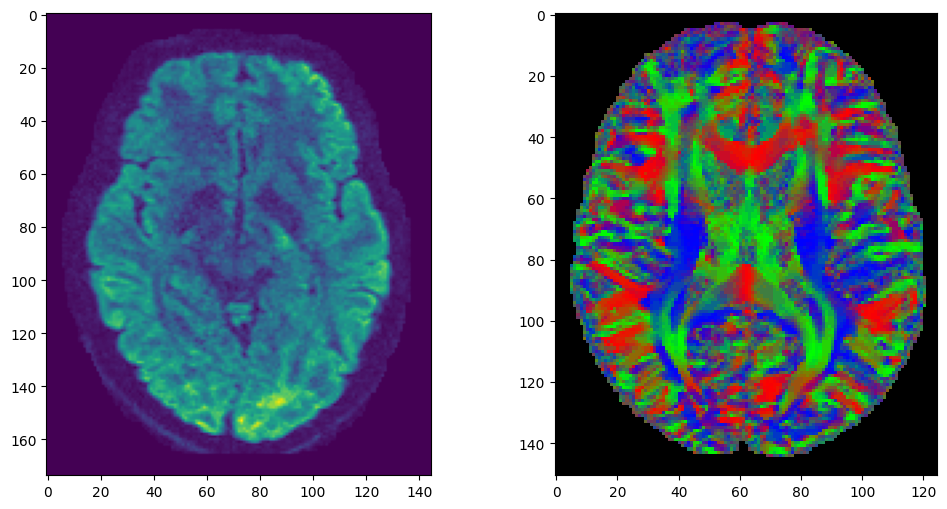

In [19]:
m=54

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(src['image30'].reshape(src['dimension'][0])[m,:,:])
plt.subplot(1,2,2)
# plt.imshow(abs(data_new[:,:,54,:])/abs(np.max(data_new[:,:,54,:])))
plt.imshow(data_new[:,:,m,:])

plt.show()

# plt.savefig("data_files/images/updated_src_fib.png")

In [20]:
df = pd.DataFrame(columns=["sid"]+["label"]+[tract.strip() for tract in tract_names])
df['sid']=sid
df['label']=labels
df['age']=age
df

,sid,label,Cingulum_Frontal_Parahippocampal_L,Cingulum_Frontal_Parahippocampal_R,Cingulum_Frontal_Parietal_L,Cingulum_Frontal_Parietal_R,Cingulum_Parahippocampal_L,Cingulum_Parahippocampal_R,Cingulum_Parahippocampal_Parietal_L,Cingulum_Parahippocampal_Parietal_R,...,Fornix_R,Superior_Longitudinal_Fasciculus1_L,Superior_Longitudinal_Fasciculus1_R,Superior_Longitudinal_Fasciculus2_L,Superior_Longitudinal_Fasciculus2_R,Superior_Longitudinal_Fasciculus3_L,Superior_Longitudinal_Fasciculus3_R,Uncinate_Fasciculus_L,Uncinate_Fasciculus_R,age
0,100004,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-25
1,100206,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-30
2,100307,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-30
3,100408,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35
4,100610,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,992774,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35
1202,993675,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-30
1203,994273,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-30
1204,995174,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-25


In [30]:
num_dir=5

subject_list = os.listdir('C:\\Users\\micha\\OneDrive - Florida State University\\Projects\\DTMRI\\HCP\\HCP_data')

# for subject_id in df['sid']:
for subject_id in subject_list:
    print(subject_id)
    
    subject_folder = 'C:\\Users\\micha\\OneDrive - Florida State University\\Projects\\DTMRI\\HCP\\HCP_data\\'+subject_id.strip()+'\\'

    #Get fib filenames
    file_list = os.listdir('C:\\Users\\micha\\OneDrive - Florida State University\\Projects\\DTMRI\\HCP\\HCP_data\\'+subject_id.strip()+'\\')
    #This is a bad way to check; the issues is the R70 in the file names
    for file in file_list:
        if file[-3:]=='.gz':
            fib_filename=subject_folder+file
  
    if os.path.exists(fib_filename):
        
        #Load fib file for subject
        fib = loadfib(fib_filename)
        
        #Check that images are expected shape
        fib_dim = fib['dimension'][0]

        if (fib_dim==[125, 151, 108]).all():
            
            #fib file contains multiple directions and magnitiudes for each voxel in full image
            #'diffusion tensors' are actually covariance matrices
            covariances_full = get_covariances(fib)

            for tract in tract_names:

                #Load .tt file for tract for subject, skip if file not found 
                # tt_filename = subject_folder + subject_id.strip()+'.'+tract.strip()+'.tt.gz'
                tt_filename = subject_folder +tract.strip()+'\\'+subject_id.strip()+'.'+tract.strip()+'.tt.gz'
                
                
                if os.path.exists(tt_filename):
                    
                    #Get tdi file from dsi studio - this provides estimated fiber counts for voxels in tract
                    #implicitly provides a segmentation for tract, in coordinates of full MRI image (in particular, consistent with fib file)
                    tract_data = loadtdi(fib_filename, tt_filename)
                    tract_coord = np.transpose(tract_data,[1,0,2])

                    #Means for a region are taken as voxels with non-zero number of fibers, as estimated by dsi studio
                    means = np.array(np.nonzero(tract_coord)).T 
                    #weights are the non-zero values in the tdi file 
                    weights = tract_coord[means[:,0],means[:,1],means[:,2]].reshape(-1,1)                    
                    #get covariances for voxels in tract
                    covariances = covariances_full[means[:,0],means[:,1],means[:,2],:,:]

                    #insert DT_GMM object into pandas dataframe
                    df.at[df.index[df['sid']==subject_id][0],tract.strip()] = DT_GMM(weights,means,covariances)

                else:
                    #create folder for region if it does not exists
                    if not os.path.exists(subject_folder +tract.strip()+'\\'):
                        os.mkdir(subject_folder +tract.strip()+'\\')
                    #create tdi file 
                    generate_tt(fib_filename, tract.strip(), tt_filename)
                    
                    if os.path.exists(tt_filename):
                        #Get tdi file from dsi studio - this provides estimated fiber counts for voxels in tract
                        #implicitly provides a segmentation for tract, in coordinates of full MRI image (in particular, consistent with fib file)
                        tract_data = loadtdi(fib_filename, tt_filename)
                        tract_coord = np.transpose(tract_data,[1,0,2])

                        #Means for a region are taken as voxels with non-zero number of fibers, as estimated by dsi studio
                        means = np.array(np.nonzero(tract_coord)).T 
                        #weights are the non-zero values in the tdi file 
                        weights = tract_coord[means[:,0],means[:,1],means[:,2]].reshape(-1,1)                    
                        #get covariances for voxels in tract
                        covariances = covariances_full[means[:,0],means[:,1],means[:,2],:,:]

                        #insert DT_GMM object into pandas dataframe
                        df.at[df.index[df['sid']==subject_id][0],tract.strip()] = DT_GMM(weights,means,covariances)
                    else:
                        print(tract.strip() + " .tt file not found")

        else:
            print(subject_id+" not correct dimension")
            
    else:
        print(subject_id + ' ' + "fib not found")     
    
    print(" ")
    
df.to_pickle("data_files/dtmri_dataframe_hcp_adult_1064.pkl")


100206
Corpus_Callosum_Tapetum .tt file not found
Fornix_L .tt file not found
 
100307
 
100408
 
100610
 
101006
Cingulum_Frontal_Parahippocampal_L .tt file not found
Cingulum_Frontal_Parahippocampal_R .tt file not found
 
101107
 
101309
Cingulum_Frontal_Parahippocampal_L .tt file not found
Cingulum_Frontal_Parahippocampal_R .tt file not found
 
101410
Cingulum_Frontal_Parahippocampal_L .tt file not found
Cingulum_Frontal_Parahippocampal_R .tt file not found
 
101915
Cingulum_Frontal_Parahippocampal_L .tt file not found
Cingulum_Frontal_Parahippocampal_R .tt file not found
Corpus_Callosum_Forceps_Major .tt file not found
 
102008
 
102109
 
102311
 
102513
 
102614
Cingulum_Frontal_Parahippocampal_R .tt file not found
 
102715
 
102816
Cingulum_Frontal_Parahippocampal_R .tt file not found
 
103010
Cingulum_Frontal_Parahippocampal_L .tt file not found
Cingulum_Frontal_Parahippocampal_R .tt file not found
Fornix_L .tt file not found
 
103111
Cingulum_Frontal_Parahippocampal_R .tt file 

In [31]:
df = pd.read_pickle("data_files/dtmri_dataframe_hcp_adult_1064.pkl")
df = df.dropna(subset=df.columns[2:],how='all').copy()
df.reset_index(inplace=True, drop=True)
df

,sid,label,Cingulum_Frontal_Parahippocampal_L,Cingulum_Frontal_Parahippocampal_R,Cingulum_Frontal_Parietal_L,Cingulum_Frontal_Parietal_R,Cingulum_Parahippocampal_L,Cingulum_Parahippocampal_R,Cingulum_Parahippocampal_Parietal_L,Cingulum_Parahippocampal_Parietal_R,...,Fornix_R,Superior_Longitudinal_Fasciculus1_L,Superior_Longitudinal_Fasciculus1_R,Superior_Longitudinal_Fasciculus2_L,Superior_Longitudinal_Fasciculus2_R,Superior_Longitudinal_Fasciculus3_L,Superior_Longitudinal_Fasciculus3_R,Uncinate_Fasciculus_L,Uncinate_Fasciculus_R,age
0,100004,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-25
1,100206,M,<dtmrpy.dtmrpy.DT_GMM object at 0x000001B93093...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA3CFC...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA6836...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAA7F7...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA3592...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA29DC...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAA96B...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA6017...,...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAF8F7...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB0DED...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB1EC9...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB33E3...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB4388...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB4C64...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB59E2...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB6E07...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB73A2...,26-30
2,100307,F,<dtmrpy.dtmrpy.DT_GMM object at 0x000001B93093...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA3CFC...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA6836...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAA7F7...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA3592...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA29DC...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAA96B...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA6017...,...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAF8F7...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB0DED...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB1EC9...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB33E3...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB4388...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB4C64...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB59E2...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB6E07...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB73A2...,26-30
3,100408,M,<dtmrpy.dtmrpy.DT_GMM object at 0x000001B93093...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA3CFC...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA6836...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAA7F7...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA3592...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA29DC...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAA96B...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA6017...,...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAF8F7...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB0DED...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB1EC9...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB33E3...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB4388...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB4C64...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB59E2...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB6E07...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB73A2...,31-35
4,100610,M,<dtmrpy.dtmrpy.DT_GMM object at 0x000001B93093...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA3CFC...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA6836...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAA7F7...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA3592...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA29DC...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAA96B...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BA6017...,...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BAF8F7...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB0DED...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB1EC9...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB33E3...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB4388...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB4C64...,<dtmrpy.dtmrpy.DT_GMM object at 0x000001BB5

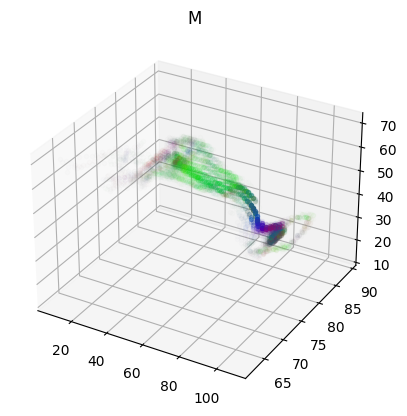

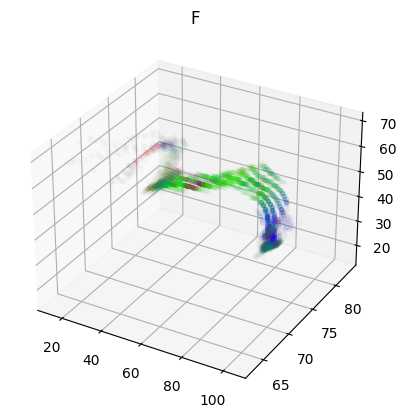

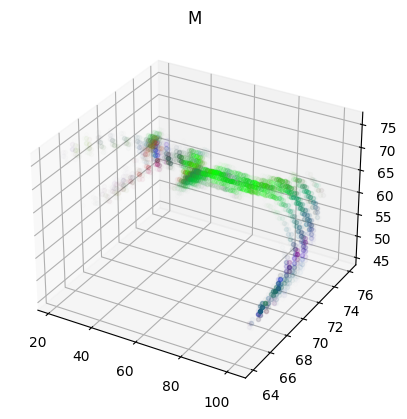

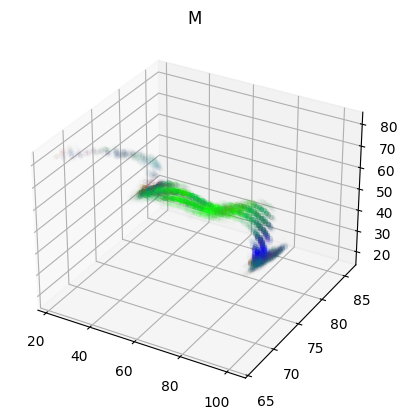

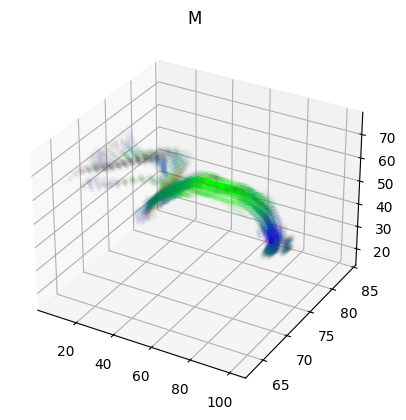

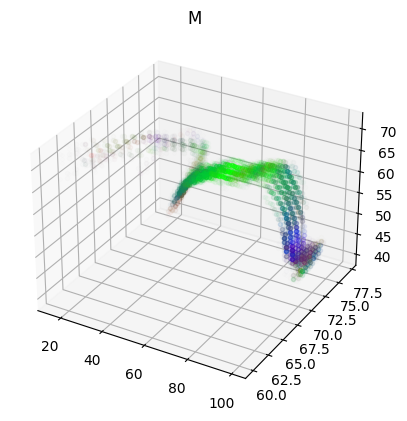

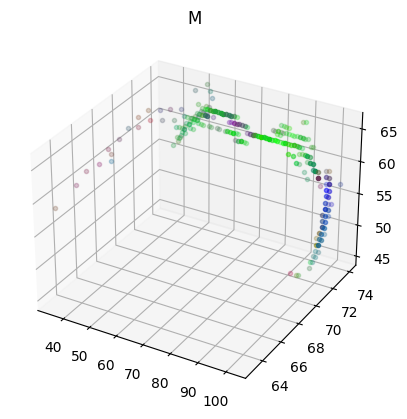

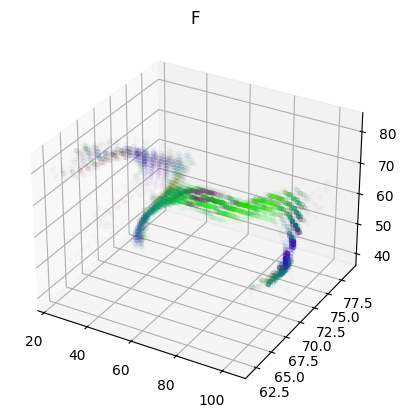

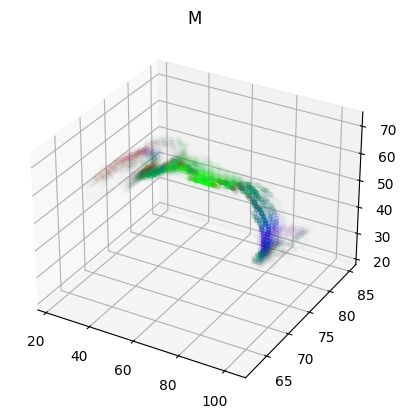

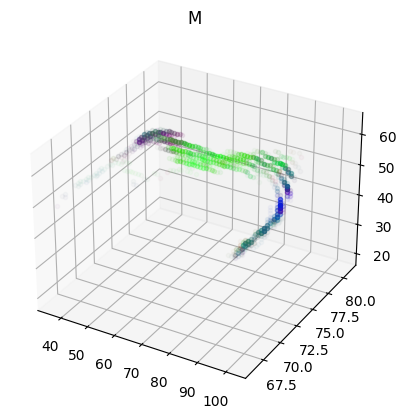

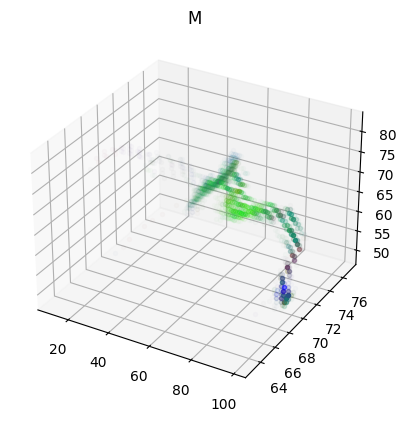

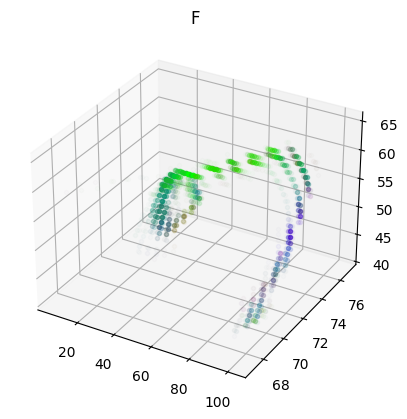

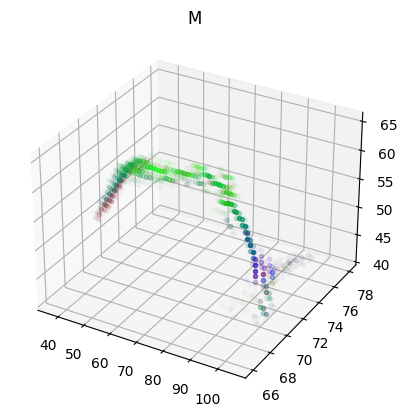

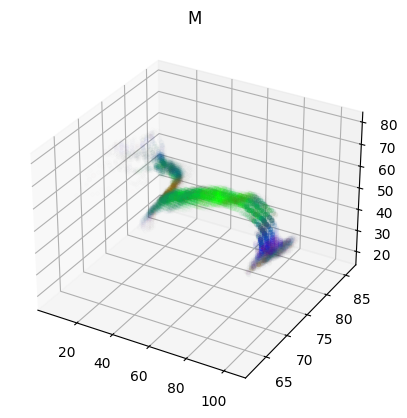

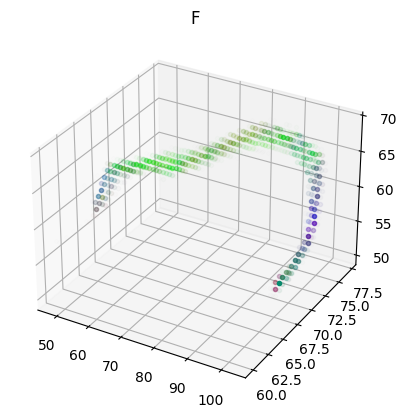

C:\Users\micha\Documents\GitHub\Research\DTMRI\dtmrpy\dtmrpy.py:91: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,y,z,'.',c=rgb/sum(rgb), alpha = w[i][0])


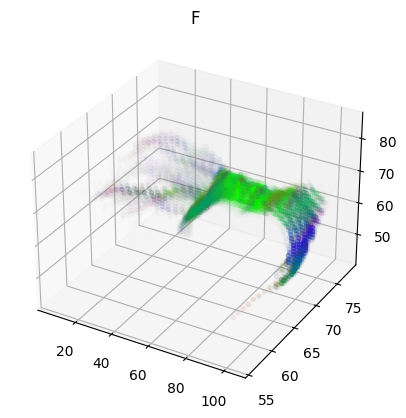

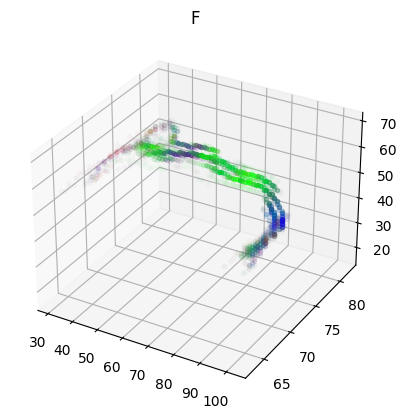

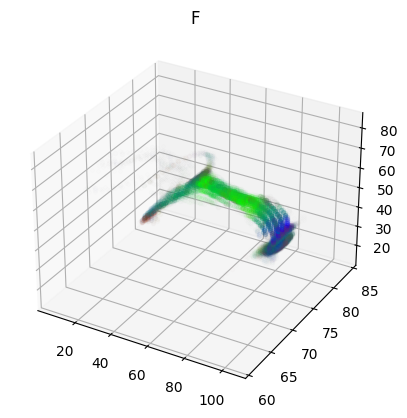

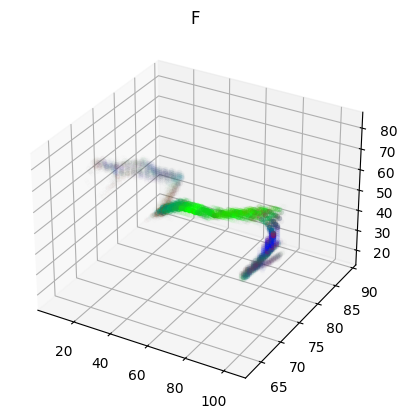

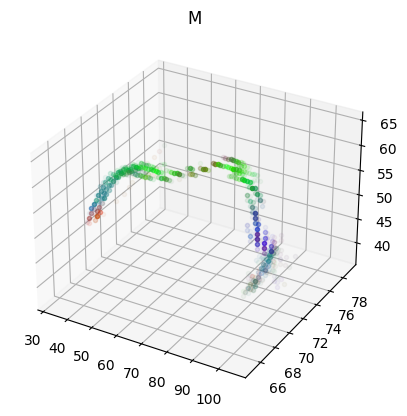

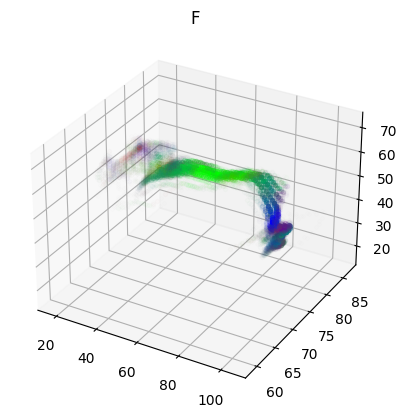

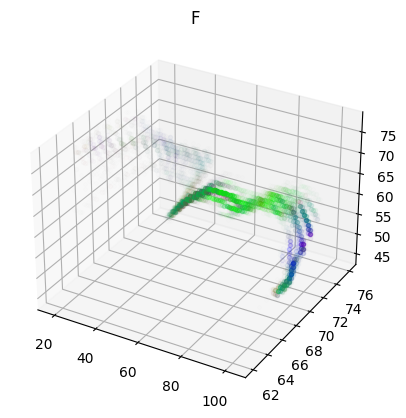

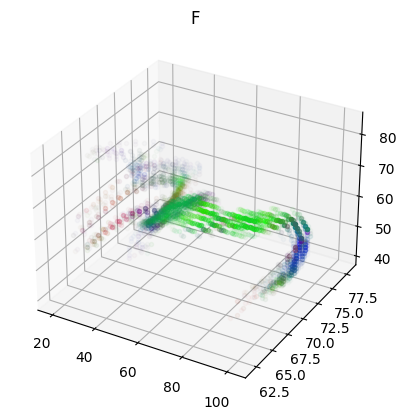

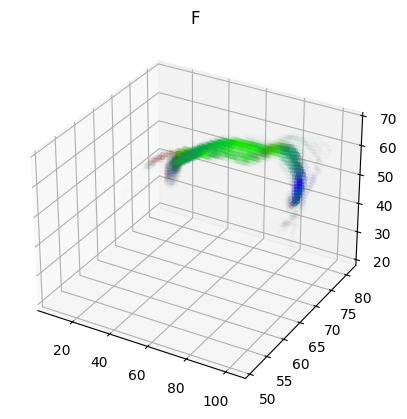

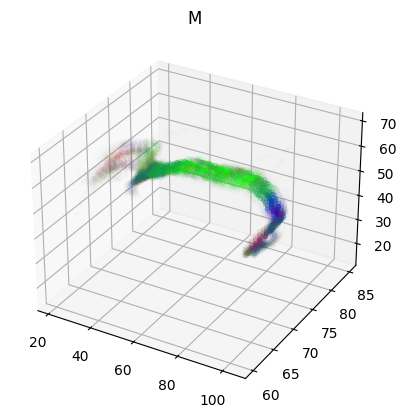

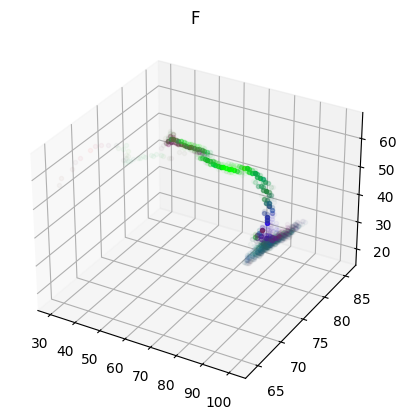

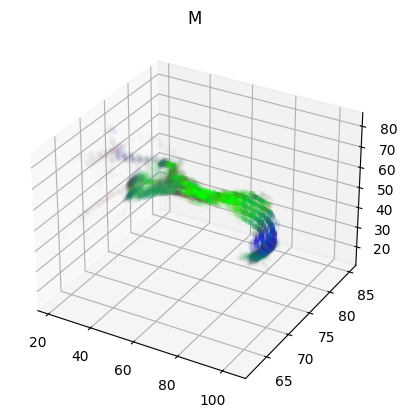

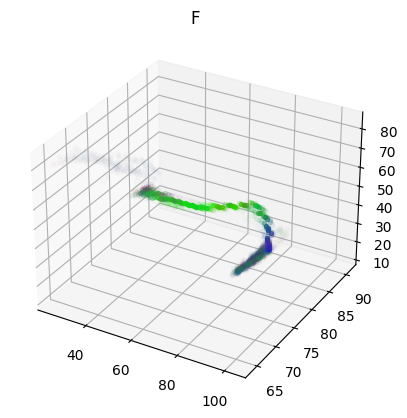

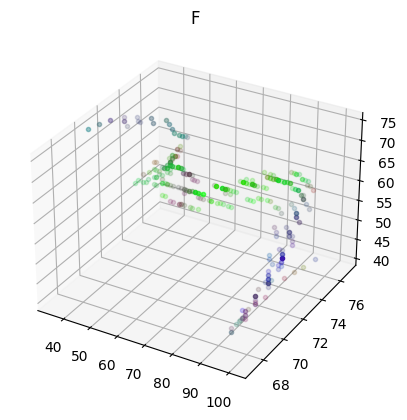

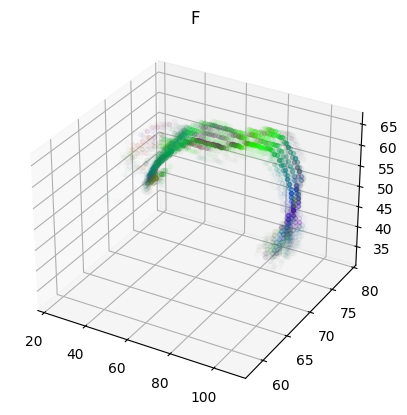

In [32]:
tract = 'Cingulum_Frontal_Parahippocampal_L'

for i in range(50):
    if type(df.at[i,tract])==DT_GMM:
        plt.figure().add_subplot(projection = '3d')
        df.at[i,tract].plot()
        plt.title(df.at[i,'label'])
        plt.show()